In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive

/content/drive/My Drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install typeguard

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 748.9MB 22kB/s 
     |████████████████████████████████| 8.8MB 34.6MB/s 
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100
  Found existing installation: torchvision 0.4.1+cu100
    Uninstalling torchvision-0.4.1+cu100:
      Successfully uninstalled torchvision-0.4.1+cu100


In [0]:
#!unzip 'data.zip'

In [0]:
from fastai import *
from fastai.vision import *
import random
bs = 32
#random.seed(23)

In [13]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (397 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Test: None

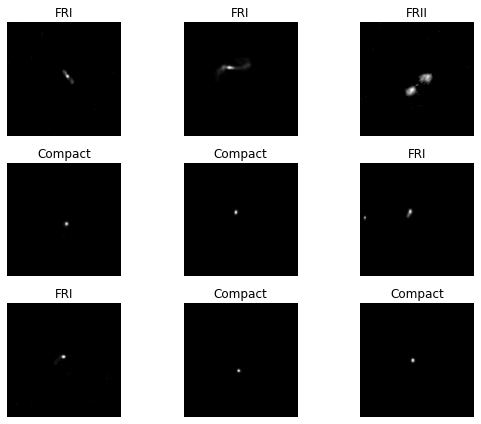

In [14]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
learn = cnn_learner(data, models.densenet169, metrics=accuracy)
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-04
Min loss divided by 10: 5.75E-03


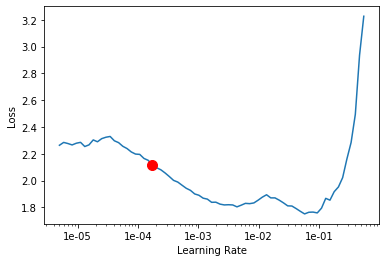

In [16]:
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.484764,0.973720,0.617128,00:28


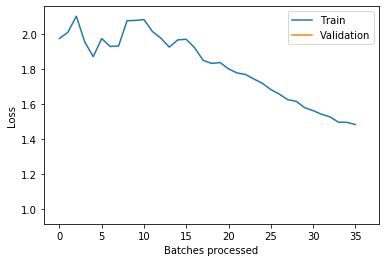

In [17]:
learn.fit_one_cycle(1, max_lr=slice(4e-5,1e-2))
#learn.save('31stage1')
learn.recorder.plot_losses()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-05
Min loss divided by 10: 1.20E-04


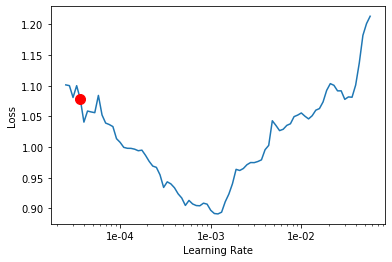

In [18]:
learn.unfreeze()
learn.lr_find(start_lr=slice(1e-6, 1e-5), end_lr=slice(1e-2, 1e-1), wd=1e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.015396,0.907180,0.649874,00:35
1,0.855036,0.667313,0.755668,00:35
2,0.664098,0.457632,0.828715,00:35


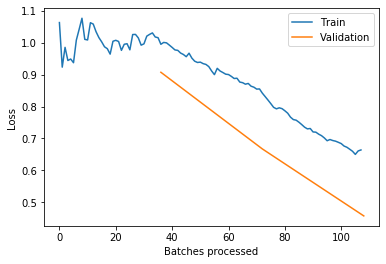

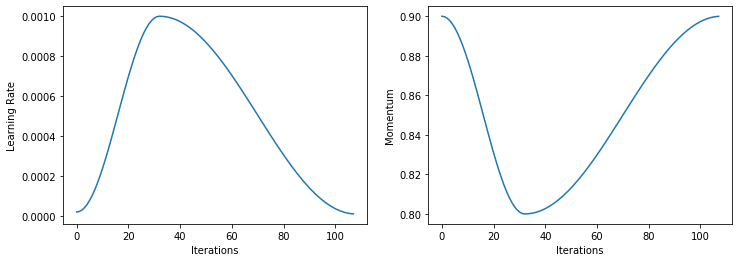

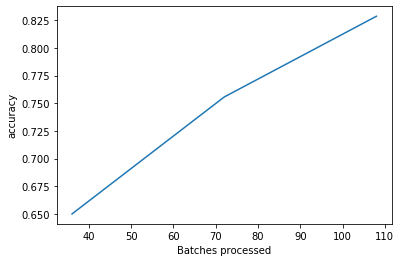

In [19]:
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-3), div_factor=50, final_div=100, wd=1e-4, moms=(0.9, 0.8))
#learn.save('stage-2')
learn.recorder.plot_losses()
# schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,0.648005,0.495310,0.783375,00:35
1,0.586627,0.452442,0.823678,00:35
2,0.499328,0.447232,0.836272,00:35
3,0.451762,0.418167,0.843829,00:35
4,0.396431,0.514271,0.798489,00:35
5,0.314221,0.360732,0.851385,00:35
6,0.252278,0.341321,0.886650,00:35
7,0.230441,0.334217,0.891688,00:35
8,0.187435,0.318178,0.896725,00:35
9,0.169063,0.301962,0.891688,00:35


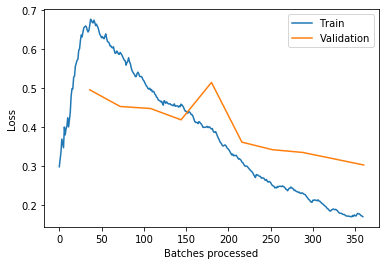

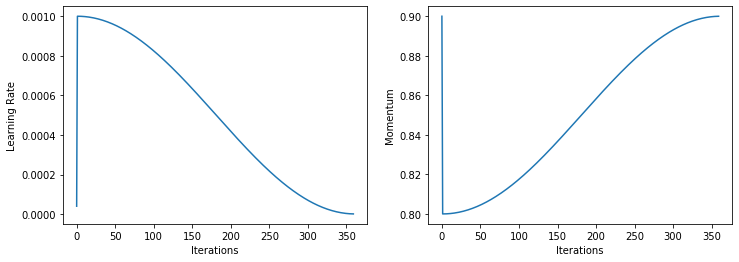

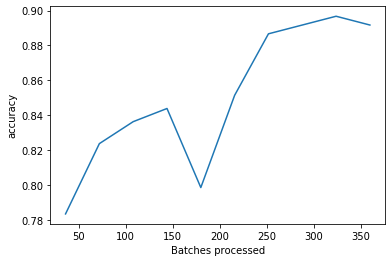

In [20]:
learn.fit_one_cycle(cyc_len=10, max_lr=slice(1e-4, 1e-3), pct_start=0, final_div=1000, wd=1e-3, moms=(0.9, 0.8)) # warm restart: pct_start=0
#learn.save('stage-3')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [0]:
learn.save('rg5-2nov-169')

In [0]:
learn.load('rg5-2nov-169')
interp = ClassificationInterpretation.from_learner(learn)

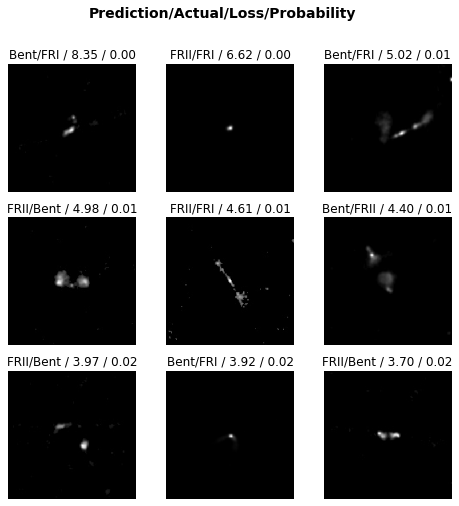

In [23]:
interp.plot_top_losses(9, figsize=(8,8))

In [24]:
losses, indexes = interp.top_losses(10)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data/valid/FRI/J143521.30-024051.7.jpg') PosixPath('data/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data/valid/FRI/J143410.56+013646.9.jpg') PosixPath('data/valid/Bent/J143448.92-021509.4.jpg')
 PosixPath('data/valid/FRI/J141138.22+495304.0.jpg') PosixPath('data/valid/FRII/J144919.01+210548.0.jpg')
 PosixPath('data/valid/Bent/J081545.53+371035.5.jpg') PosixPath('data/valid/FRI/J140313.27+061008.2.jpeg')
 PosixPath('data/valid/Bent/J080431.42+192212.9.jpg') PosixPath('data/valid/FRI/J143825.92-010001.5.jpg')]


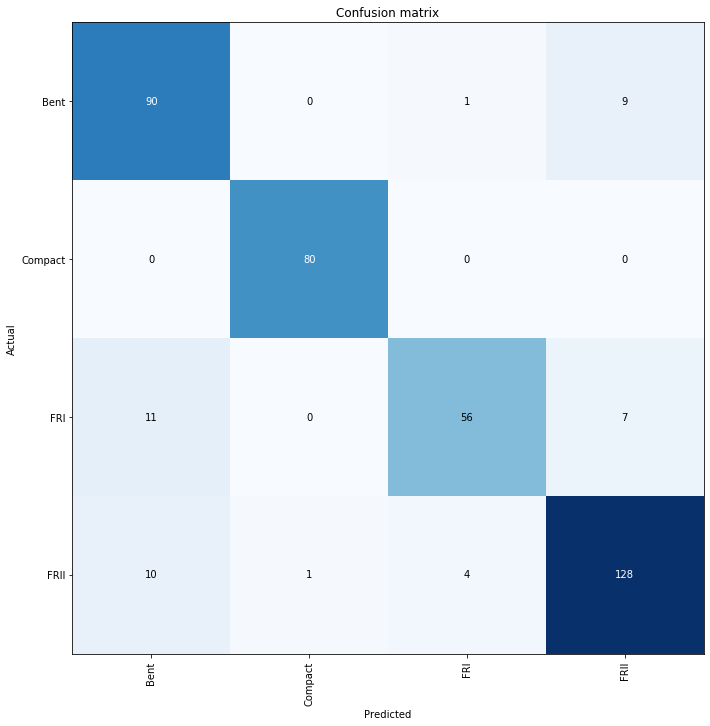

In [25]:
interp.plot_confusion_matrix(figsize=(10,10))

In [26]:
path_img = Path('data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1180 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: data;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: data;

Test: None

In [0]:
learn = cnn_learner(data, models.densenet169, metrics=[accuracy])

In [0]:
learn = learn.load('rg5-2nov-169')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

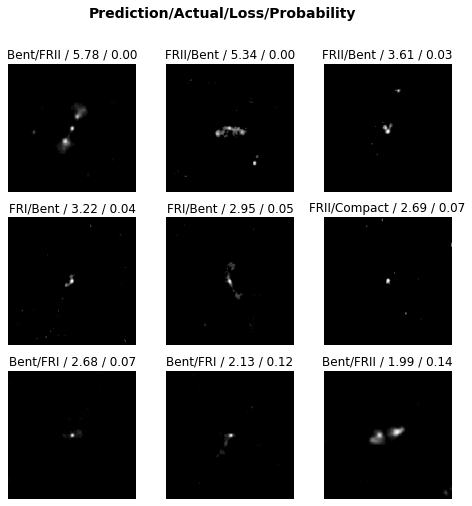

In [30]:
interp.plot_top_losses(9, figsize=(8,8))

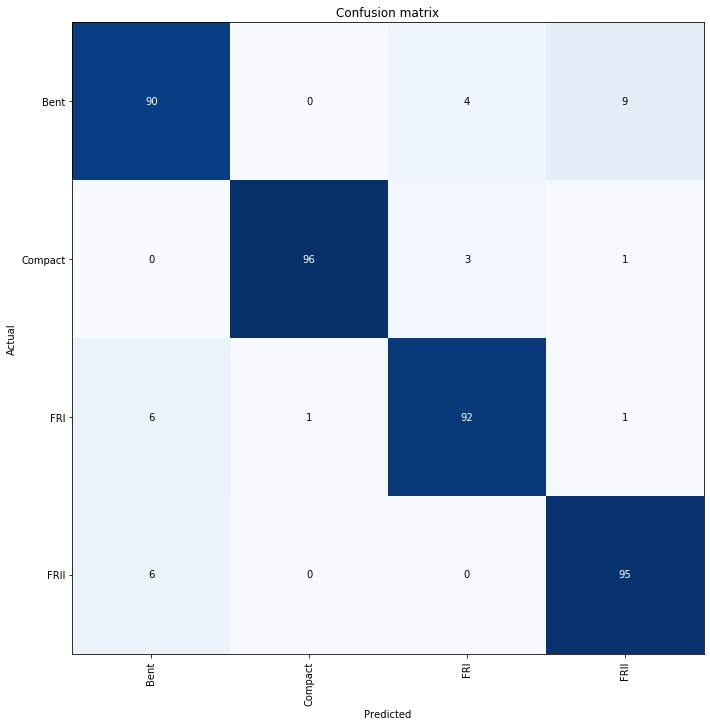

In [31]:
interp.plot_confusion_matrix(figsize=(10,10))

In [32]:
import glob

image_list = glob.glob('data/test/*/*')

Bent = 0
Pred_Bent=0
Compact=0
Pred_Compact=0
FRI=0
Pred_FRI=0
FRII=0
Pred_FRII = 0 

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    rg_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if rg_class == 'Bent':
        Bent += 1
        if pred_class == 'Bent':
            Pred_Bent += 1
    elif rg_class == 'Compact':
        Compact += 1
        if pred_class == 'Compact':
            Pred_Compact += 1
    elif rg_class == 'FRI':
        FRI += 1
        if pred_class == 'FRI':
            Pred_FRI += 1
    elif rg_class == 'FRII':
        FRII += 1
        if pred_class == 'FRII':
            Pred_FRII += 1
            
    
print('Bent accuracy: ' + str(Pred_Bent) + '/' + str(Bent))
print('Compact accuracy: ' + str(Pred_Compact) + '/' + str(Compact))
print('FR1 accuracy: ' + str(Pred_FRI) + '/' + str(FRI) )
print('FR2 accuracy: ' + str(Pred_FRII) + '/' + str(FRII) )

Bent accuracy: 90/103
Compact accuracy: 96/100
FR1 accuracy: 92/100
FR2 accuracy: 95/101
